In [1]:
import torch

## Q1
Draw Computation Graph and work out the gradient dz/da by following the path
back from z to a and compare the result with the analytical gradient.
```
x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y
```

In [2]:
a = torch.tensor(3., requires_grad=True)
b = torch.tensor(4., requires_grad=True)

In [3]:
x = 2*a + 3*b
y = 5*a*a + 3*b*b*b

In [4]:
z = 2*x + 3*y

In [5]:
z.backward()

In [6]:
def f(a,b):
    x = 2*a + 3*b
    y = 5*a*a + 3*b*b*b
    return 2*x + 3*y

def df(a,b):
    return 2*(2) + 3*(10*a)

In [ ]:
print('Analytical Gradient: ', df(a,b))
print('Torch Gradient: ', a.grad)

## Q2

![Screenshot from 2025-01-14 09-33-08.png](<attachment:Screenshot from 2025-01-14 09-33-08.png>)
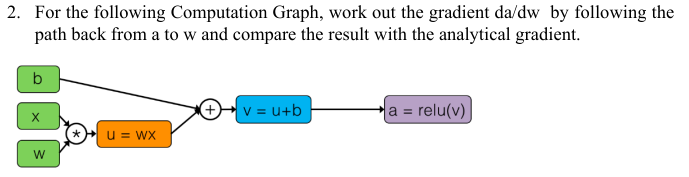

In [2]:
x = torch.tensor(2., requires_grad=True)
w = torch.tensor(3., requires_grad=True)
b = torch.tensor(4., requires_grad=True)

In [3]:
u = x*w
v = u+b

In [ ]:
a = torch.relu(v)
a.backward()

In [12]:
def da_dw(w,x,b):
    if x*w+b == 0:
        return 0
    return x + 0

In [ ]:
print('Analytical Gradient: ', da_dw(w, x, b))
print('Torch Gradient: ', w.grad)

## Q3
Repeat the Problem 2 using Sigmoid function

In [4]:
a = torch.sigmoid(v)
a.backward()

In [9]:
def da_dw_sig(w,x,b):
    a = torch.sigmoid(w*x + b)
    return (a)*(1-a)*(x)

In [10]:
print('Analytical Gradient: ', da_dw_sig(w,x,b))
print('Torch Gradient: ', w.grad)

Analytical Gradient:  tensor(9.0833e-05, grad_fn=<MulBackward0>)
Torch Gradient:  tensor(9.0833e-05)


## Q4
Verify that the gradients provided by PyTorch match with the analytical gradients of
the function f= exp(-x2-2x-sin(x)) w.r.t x

In [11]:
x = torch.tensor(3., requires_grad=True)
f = torch.exp((-x*x) + (-2*x) + (-torch.sin(x)))
f.backward()

tensor(-1.8621e-06)

In [16]:
def df_dx(x):
    return ((-2*x) + (-2) + (-torch.cos(x))) * (torch.exp((-x*x) + (-2*x) + (-torch.sin(x))))

In [18]:
print('Analytical Gradient: ', df_dx(x))
print('Torch Gradient: ', x.grad)

Analytical Gradient:  tensor(-1.8621e-06, grad_fn=<MulBackward0>)
Torch Gradient:  tensor(-1.8621e-06)


## Q6
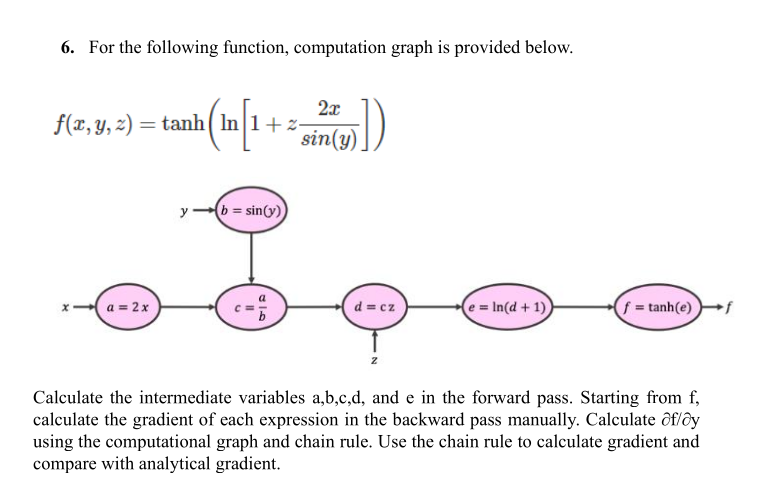

In [19]:
import torch

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)

a = 2 * x
b = torch.sin(y)
c = a / b if b != 0 else torch.tensor(0.0, requires_grad=True)
d = c * z
e = torch.log(1 + d) if (1 + d) > 0 else torch.tensor(0.0, requires_grad=True)
f = torch.tanh(e)
f.backward()

def df_de():
    return (1-f*f)
def de_dd():
    return (1/(1+d)) if (1 + d) > 0 else torch.tensor(0.0, requires_grad=True)
def dd_dc():
    return z
def dc_da():
    return 1/b if b != 0 else torch.tensor(0.0, requires_grad=True)
def dc_db():
    return -(a/(b*b))
def da_dx():
    return 2
def db_dy():
    return torch.cos(y)

In [26]:
print(f"a: {a.item()}") 
print(f"b: {b.item()}") 
print(f"c: {c.item()}") 
print(f"d: {d.item()}") 
print(f"e: {e.item()}")

print(f"df/de: {df_de()}") 
print(f"de/dd: {de_dd()}") 
print(f"dd/dc: {dd_dc()}") 
print(f"dc/da: {dc_da()}") 
print(f"dc/db: {dc_db()}") 
print(f"da/dx: {da_dx()}")
print(f"db/dy: {db_dy()}")

a: 2.0
b: 0.9092974066734314
c: 2.199500322341919
d: 6.598501205444336
e: 2.0279510021209717
df/de: 0.0669405460357666
de/dd: 0.1316048949956894
dd/dc: 3.0
dc/da: 1.0997501611709595
dc/db: -2.418900966644287
da/dx: 2
db/dy: -0.416146844625473


In [25]:
print('Analytical Gradient: ', df_de()*de_dd()*dd_dc()*dc_db()*db_dy())
print('Torch Gradient: ', y.grad)

Analytical Gradient:  tensor(0.0266, grad_fn=<MulBackward0>)
Torch Gradient:  tensor(0.0266)
